# Data Analysis for Senvest Capital
#### This notebook provides various analyses on the financial data of senvest capital.

Relevant imports...

In [68]:
%pylab
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure', 'cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
filepath = '/home/matthew/Senvest/'
fin_df = pd.read_csv(filepath + 'Financial Data.csv',index_col=0)
stock_info = pd.read_csv(filepath + 'StockInfo.csv')
tsx_info = pd.read_csv(filepath + 'TSX.csv')

In [3]:
##Reverse column order (so years are in correct order)
fin_df = fin_df.ix[::,::-1]

##Split operational and financial info
operation_info = fin_df.transpose()[fin_df.index[:3]]
financial_data = fin_df.transpose()[fin_df.index[3:]]


## Getting the operational and financial information
Display the relevant data in tables.

In [61]:
operation_info

,Total Revenues & Investment Gains,Net Income Attributable to Common Shareholders,Diluted Earnings Per Share
2011,84712.0,-80682.0,-28.61
2012,154035.0,73964.0,25.65
2013,489676.0,206516.0,73.20
2014,297551.0,117298.0,41.26
2015,-166763.0,-99826.0,-35.39


In [62]:
financial_data

,Total Assets,Shareholders’ Equity
2011,544426.0,284685.0
2012,728409.0,358831.0
2013,1400326.0,630362.0
2014,2020142.0,821740.0
2015,2146380.0,856290.0


## Analyzing the stock information 
First, we'll describe the data. We'll be using the TSX/S&P Composite as a benchmark, and use it to determine the companies beta and visualize the stock movements.

In [69]:
stock_info[['Open','Close']].describe()

,Open,Close
count,975.000000,975.000000
mean,140.613036,140.666246
std,31.591721,31.653026
min,68.010002,68.010002
25%,127.030002,126.690002
50%,149.919998,149.750000
75%,159.000000,159.000000
max,200.350006,200.000000


### Let's map the changes in closing price..

In [70]:
## Drop null row (just last row)
stock_info = stock_info.dropna()
stock_info['SEC % Change'] = (stock_info['Close']-stock_info['Close']. \
                          shift(-1))/stock_info['Close'].shift(-1) * 100
tsx_info['TSX % Change'] = (tsx_info['Close']-tsx_info['Close']. \
                          shift(-1))/tsx_info['Close'].shift(-1) * 100

stock_info.head()

,Date,Open,High,Low,Close,Volume,Adj Close,SEC % Change
0,2016-11-18,153.600006,153.610001,153.589996,153.600006,1400,153.600006,1.285864
1,2016-11-17,151.449997,152.470001,151.449997,151.649994,3900,151.649994,0.099006
2,2016-11-16,150.000000,151.759995,150.000000,151.500000,1300,151.500000,0.490850
3,2016-11-15,150.759995,150.759995,150.759995,150.759995,0,150.759995,0.000000
4,2016-11-14,150.500000,150.759995,150.500000,150.759995,200,150.759995,-0.481887


In [14]:
percent_change = pd.DataFrame([stock_info['Date'],stock_info['SEC % Change'],tsx_info['TSX % Change']]).transpose()
stock_compare = pd.DataFrame([stock_info['Date'],stock_info['Close'],tsx_info['Close']]).transpose()

In [15]:
percent_change = percent_change.dropna()
stock_compare = stock_compare.dropna()

In [80]:
cov = np.cov(percent_change['TSX % Change'],percent_change['SEC % Change'])[0][1]/np.var(percent_change['TSX % Change'])
print ("Beta is {}".format(cov))

Beta is 0.2830397242439486


AttributeError: 'float' object has no attribute 'sqrt'

## The Beta is ~.28
This was calculated via the formula: covar(% Change in SEC Price, % Change in TSX Price)/var(% Change in TSX price)

In [74]:
dates = pd.to_datetime(stock_compare['Date'])

AttributeError: 'Series' object has no attribute 'lower'

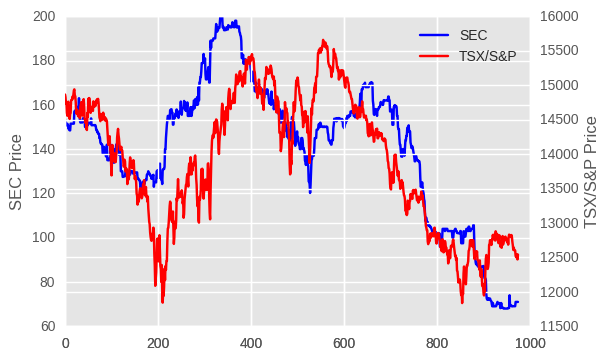

In [81]:
figure = plt.figure()
ax1 = figure.add_subplot(111)
line1, = ax1.plot(stock_info['Close'],'xb-')
ylabel("SEC Price")


ax2 = figure.add_subplot(111,sharex=ax1,frameon=False)
line2, = ax2.plot(tsx_info['Close'],'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("TSX/S&P Price")
legend((line1,line2),('SEC','TSX/S&P'))
figure.add_axes()
plt.xlabel("Days since Jan 2, 2013")

ax1.grid(False)
ax2.grid(False)
plt.title("SEC Price vs TSX Price")
show()
